In [2]:
%matplotlib inline
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
intake_df = pd.read_csv('intake.csv', sep='\t')
#intake_df.head()

In [4]:
new_target_names = []
for target in intake_df['target_name']:
    if target[0:8] =='CHIPSEQ_':
        new_target_names.append('CHIPSEQ')
    else:
        new_target_names.append(target)
len(new_target_names)

new_dates = []
for date in intake_df['begin_date']:
    new_dates.append(date.split()[0])

In [5]:
temp_df = pd.DataFrame({'target_name': new_target_names, 'begin_date': new_dates})
intake_df.update(temp_df)
intake_df.head()

,anls_type_name,anls_run_name,formal_name,target_name,project_name,subproject,genome,begin_date,end_date,duration
0,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
1,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
2,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
3,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
4,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606


In [6]:
chip_df = intake_df[intake_df['target_name'] == 'CHIPSEQ']
chip_df.head()

,anls_type_name,anls_run_name,formal_name,target_name,project_name,subproject,genome,begin_date,end_date,duration
0,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
1,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
2,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
3,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606
4,intake,j5PYhAMm,SJMMNORM054925_C1,CHIPSEQ,Dyer,Dyer,MGSCv37,2018-01-05,2018-01-05 19:17:58.551347,431.955606


In [7]:
chip_bd_df = chip_df.groupby(['begin_date']).mean()
chip_bd_df.head()

,duration
begin_date,
2015-07-28,78307.603659
2015-07-29,1290.318643
2015-07-30,438.563781
2015-08-03,831.016851
2015-08-04,13887.173378


In [67]:
sorted_chip_bd_df = chip_bd_df.sort_index(level=1)
sorted_chip_bd_df.head()
sorted_chip_bd_df.shape

(147, 1)

In [80]:
# Select last few rows
sorted_chip_bd_df = sorted_chip_bd_df.iloc[range(1, sorted_chip_bd_df.shape[0])]
sorted_chip_bd_df.head()

,duration,outlier
begin_date,,
2015-08-21,4427.583816,False
2015-08-31,30400.173084,False
2015-09-02,3183.639869,False
2015-09-16,60933.806547,False
2015-09-22,52376.447016,False


In [73]:
print('mean: ' + str(sorted_chip_bd_df['duration'].mean()) + ' seconds')
print('std: ' + str(sorted_chip_bd_df['duration'].std()) + ' seconds')
sorted_chip_bd_df['outlier'] = abs(sorted_chip_bd_df['duration'] - sorted_chip_bd_df['duration'].mean()) > 1.96 * sorted_chip_bd_df['duration'].std()
sorted_chip_no_outlier_df = sorted_chip_bd_df[sorted_chip_bd_df['outlier'] == False]
#sorted_chip_no_outlier_df.head()

mean: 34854.39093739933 seconds
std: 101756.48027491981 seconds


[<matplotlib.text.Text at 0x113094c50>, <matplotlib.text.Text at 0x11307d7b8>]

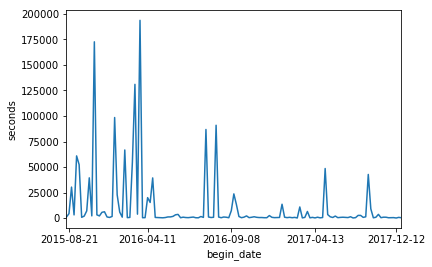

In [92]:
pl = sorted_chip_no_outlier_df['duration'].plot(y='seconds', xticks=[1, 32, 65, 98, 130])
pl.set(ylabel='seconds', xlabel='begin_date')